# Deep learning from scratch: homework 3

### General instructions

Complete the exercises listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.  

Included with the notebook are 

- a custom utilities file called `custom_utils.py` that provides various plotting functionalities (for unit tests to help you debug) as well as some other processing code


- datasets for exercises: `unnorm_linregress_data.csv`, `highdim_multirange_linregress.csv`, `student_debt.csv`, and  `noisy_sin_sample.csv`

be sure you have these files located in the same directory where you put this notebook to work!

### When submitting this homework:
    
**Make sure all output is present in your notebook prior to submission**

In [1]:
# import autograd functionality
import autograd.numpy as np
from autograd import grad as compute_grad 
import autograd.util
from autograd.misc.flatten import flatten_func

# from autograd import flatten_func


# import custom utilities
import custom_utilities as util

# import various other libraries
import copy
import matplotlib.pyplot as plt

# this is needed to compensate for %matplotl+ib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%matplotlib notebook
%load_ext autoreload
%autoreload 2

Feel free to use the following ``gradient_descent`` function below for this exercise.

In [2]:
# gradient descent function
def gradient_descent(g,w,alpha,max_its,beta,version):    
    # flatten the input function, create gradient based on flat function
    g_flat, unflatten, w = flatten_func(g, w)
    grad = compute_grad(g_flat)

    # record history
    w_hist = []
    w_hist.append(unflatten(w))

    # start gradient descent loop
    z = np.zeros((np.shape(w)))      # momentum term
    
    # over the line
    for k in range(max_its):   
        # plug in value into func and derivative
        grad_eval = grad(w)
        grad_eval.shape = np.shape(w)

        ### normalized or unnormalized descent step? ###
        if version == 'normalized':
            grad_norm = np.linalg.norm(grad_eval)
            if grad_norm == 0:
                grad_norm += 10**-6*np.sign(2*np.random.rand(1) - 1)
            grad_eval /= grad_norm
            
        # take descent step with momentum
        z = beta*z + grad_eval
        w = w - alpha*z

        # record weight update
        w_hist.append(unflatten(w))

    return w_hist

#### <span style="color:#a50e3e;">Exercise 2. </span>  Normalizing the input of a student debt dataset

The cell below loads in and visualizes a student debt dataset.  Here the input is in increments of time, and the output is the corresponding total amount of student debt held in the United States.

<IPython.core.display.Javascript object>


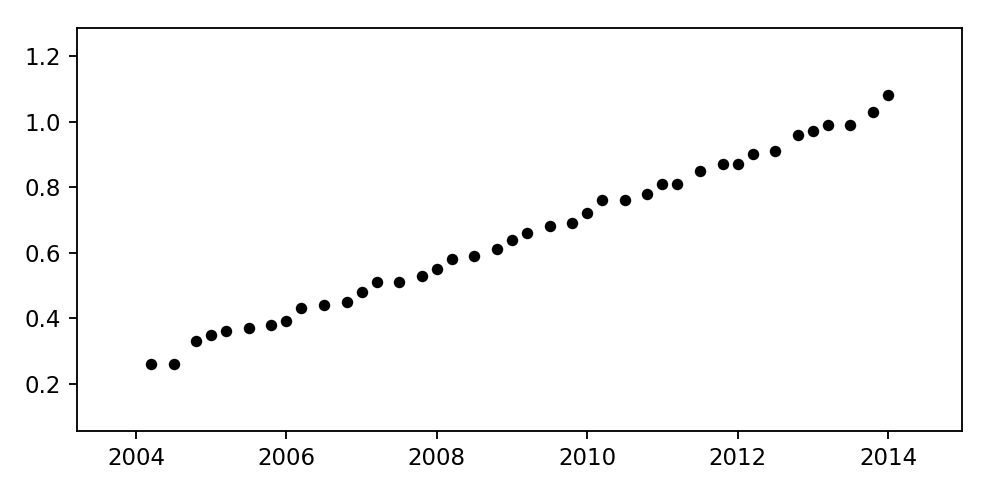

In [48]:
# load data
data = np.loadtxt('student_debt.csv',delimiter = ',')
x = data[:,:-1]
y = data[:,-1:]
# make copy of input and output (for later)
x_orig = copy.deepcopy(x)
y_orig = copy.deepcopy(y)

# plot everything
demo = util.Visualizer()
demo.plot_data_fit(x,y)

**TO DO**

Compare the performance of gradient descent in tuning the Least Squares cost function on this dataset when you use the raw dataset versus when you normalize the input.  Use only $25$ iterations of gradient descent in each instance, and in each instance use the largest steplength value $\alpha$ of the form $10^{-\gamma}$ (where $\gamma$ is a positive integer) that produces convergence.  Use an initial point $\mathbf{w}^0 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$.

**You should turn in:**
    
**1)** a contour plot in each instance with gradient descent path drawn on top (as shown in ``Exercise 1``


**2)** a cost function plot for each run of gradient descent



**3)** a short explanation summarizing what input normalization has done in this instance in terms of speeding up gradient descent

**Hint:**

Feel free to steal useful code chunks from the previous exercise!

1:regular gradient decent

In [4]:
# make our predict function
def predict(x,w):
    return w[0] + x*w[1]



In [43]:
x_orig

array([[ 2004.2],
       [ 2004.5],
       [ 2004.8],
       [ 2005. ],
       [ 2005.2],
       [ 2005.5],
       [ 2005.8],
       [ 2006. ],
       [ 2006.2],
       [ 2006.5],
       [ 2006.8],
       [ 2007. ],
       [ 2007.2],
       [ 2007.5],
       [ 2007.8],
       [ 2008. ],
       [ 2008.2],
       [ 2008.5],
       [ 2008.8],
       [ 2009. ],
       [ 2009.2],
       [ 2009.5],
       [ 2009.8],
       [ 2010. ],
       [ 2010.2],
       [ 2010.5],
       [ 2010.8],
       [ 2011. ],
       [ 2011.2],
       [ 2011.5],
       [ 2011.8],
       [ 2012. ],
       [ 2012.2],
       [ 2012.5],
       [ 2012.8],
       [ 2013. ],
       [ 2013.2],
       [ 2013.5],
       [ 2013.8],
       [ 2014. ]])

In [5]:
w = np.array([-200,0.1])
print ('predictions for all our poitns')
print (predict(x_orig,[-200,0.1]).T)
print(y_orig.T)

predictions for all our poitns
[[ 0.42  0.45  0.48  0.5   0.52  0.55  0.58  0.6   0.62  0.65  0.68  0.7
   0.72  0.75  0.78  0.8   0.82  0.85  0.88  0.9   0.92  0.95  0.98  1.
   1.02  1.05  1.08  1.1   1.12  1.15  1.18  1.2   1.22  1.25  1.28  1.3
   1.32  1.35  1.38  1.4 ]]
[[ 0.26  0.26  0.33  0.35  0.36  0.37  0.38  0.39  0.43  0.44  0.45  0.48
   0.51  0.51  0.53  0.55  0.58  0.59  0.61  0.64  0.66  0.68  0.69  0.72
   0.76  0.76  0.78  0.81  0.81  0.85  0.87  0.87  0.9   0.91  0.96  0.97
   0.99  0.99  1.03  1.08]]


In [59]:
# least squares
least_squares = lambda w: np.sum((predict(x,w) - y)**2)

<IPython.core.display.Javascript object>


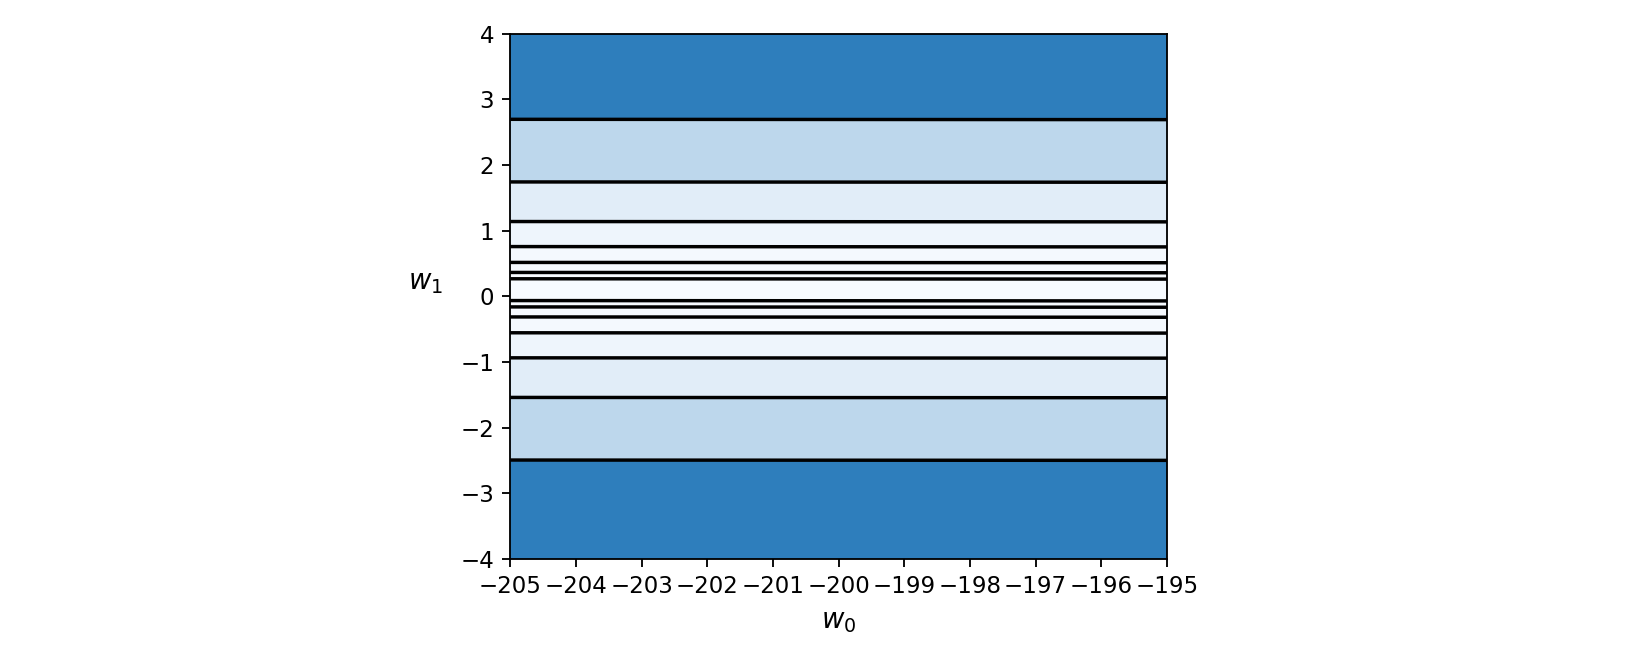

In [20]:
# plot contour of cost
demo.draw_setup(least_squares,num_contours = 7,xmin = -205,xmax = -195,ymin = -4,ymax = 4)

<IPython.core.display.Javascript object>


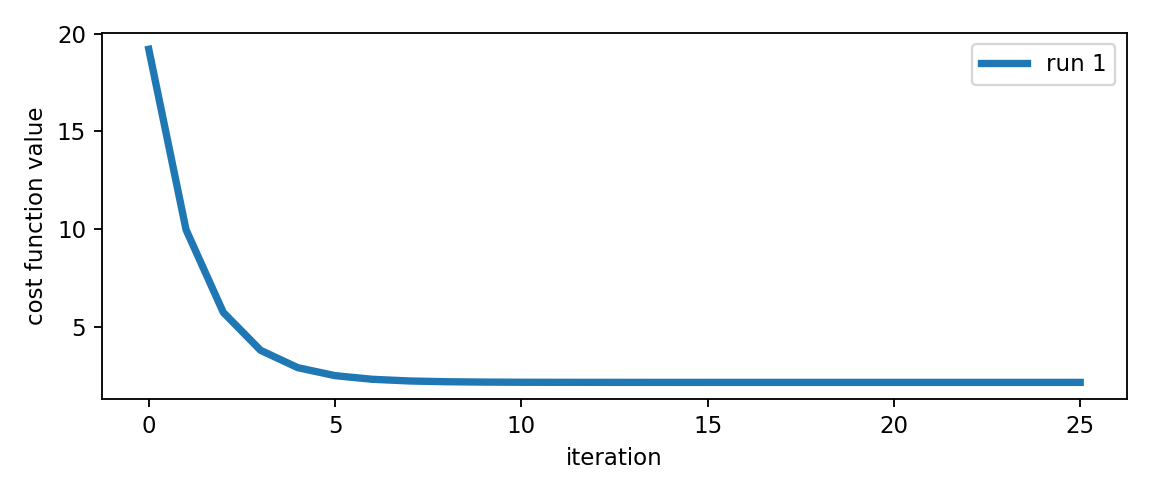

In [57]:
# run gradient descent initialized at 0
alpha = 10**(-9)
max_its = 25
w_init = np.zeros((2,1))

# run gradient descent
weight_history = gradient_descent(least_squares,w_init,alpha,max_its,beta = 0,version = 'unnormalized')

# plot cost function history
cost_history = [least_squares(v) for v in weight_history]
histories = [cost_history]
demo.compare_regression_histories(histories)

In [23]:
weight_history

[array([[ 0.],
        [ 0.]]), array([[  5.22200000e-08],
        [  1.04970112e-04]]), array([[  8.75681497e-08],
        [  1.76042498e-04]]), array([[  1.11492832e-07],
        [  2.24163662e-04]]), array([[  1.27682998e-07],
        [  2.56745184e-04]]), array([[  1.38636334e-07],
        [  2.78805239e-04]]), array([[  1.46043957e-07],
        [  2.93741498e-04]]), array([[  1.51050874e-07],
        [  3.03854429e-04]]), array([[  1.54432340e-07],
        [  3.10701618e-04]]), array([[  1.56713257e-07],
        [  3.15337661e-04]]), array([[  1.58249022e-07],
        [  3.18476600e-04]]), array([[  1.59280265e-07],
        [  3.20601889e-04]]), array([[  1.59969911e-07],
        [  3.22040864e-04]]), array([[  1.60428270e-07],
        [  3.23015154e-04]]), array([[  1.60730032e-07],
        [  3.23674820e-04]]), array([[  1.60925765e-07],
        [  3.24121461e-04]]), array([[  1.61049710e-07],
        [  3.24423870e-04]]), array([[  1.61125048e-07],
        [  3.24628622e-04]]),

<IPython.core.display.Javascript object>


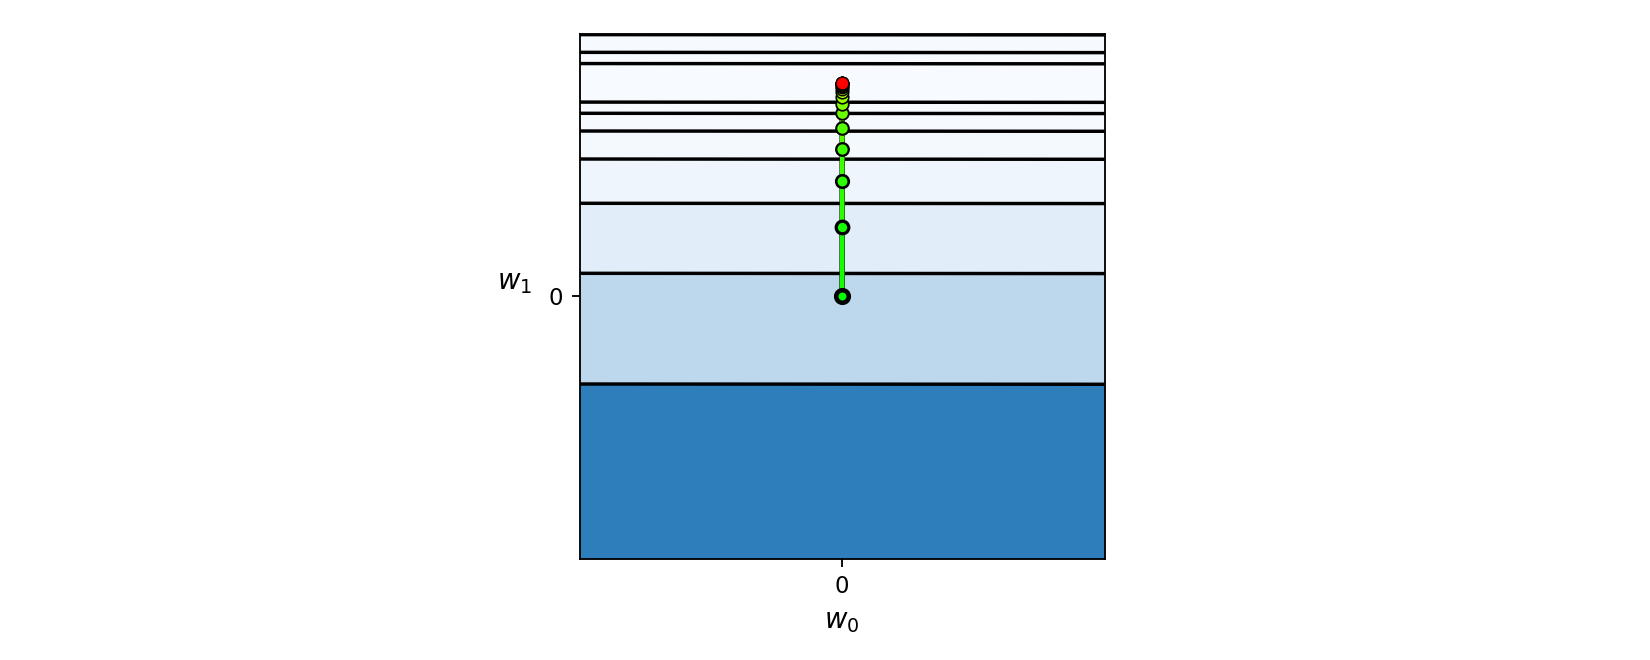

In [28]:
# plot history on contours
demo.draw_setup(least_squares,num_contours = 7,weight_history = weight_history, xmin = -0.0004,xmax = 0.0004,ymin = -0.0004,ymax =0.0004)

2: normalize

In [29]:
# compute the mean and standard deviation of the input
x_mean = np.mean(x)
x_std = np.std(x)

In [47]:
x_mean

2009.125

In [49]:
# a normalization function 
def normalize(data,data_mean,data_std):
    normalized_data = (data - data_mean)/data_std
    return normalized_data

In [50]:
x = normalize(x,x_mean,x_std)

In [51]:
x

array([[-1.70519636],
       [-1.60132653],
       [-1.4974567 ],
       [-1.42821015],
       [-1.35896359],
       [-1.25509376],
       [-1.15122394],
       [-1.08197738],
       [-1.01273083],
       [-0.908861  ],
       [-0.80499117],
       [-0.73574462],
       [-0.66649807],
       [-0.56262824],
       [-0.45875841],
       [-0.38951186],
       [-0.32026531],
       [-0.21639548],
       [-0.11252565],
       [-0.0432791 ],
       [ 0.02596746],
       [ 0.12983729],
       [ 0.23370711],
       [ 0.30295367],
       [ 0.37220022],
       [ 0.47607005],
       [ 0.57993988],
       [ 0.64918643],
       [ 0.71843298],
       [ 0.82230281],
       [ 0.92617264],
       [ 0.99541919],
       [ 1.06466575],
       [ 1.16853557],
       [ 1.2724054 ],
       [ 1.34165196],
       [ 1.41089851],
       [ 1.51476834],
       [ 1.61863817],
       [ 1.68788472]])

<IPython.core.display.Javascript object>


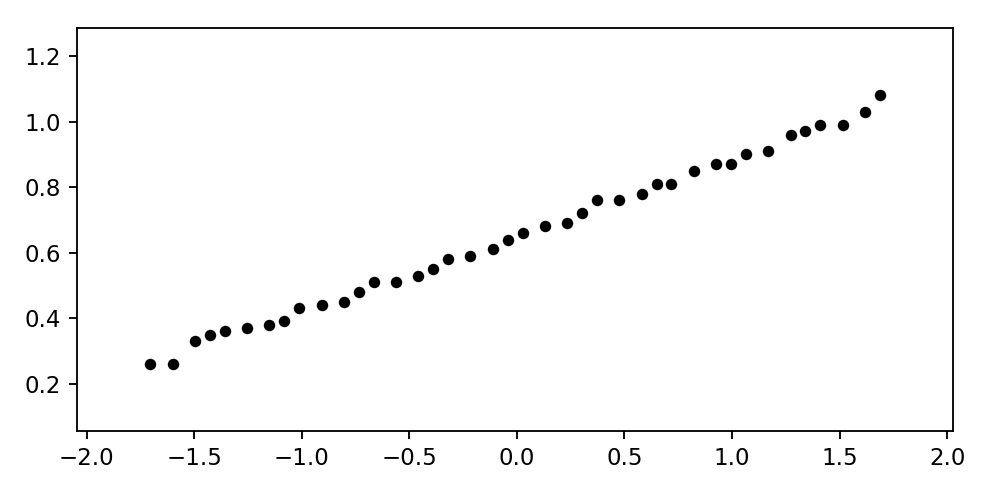

In [55]:
demo.plot_data_fit(x,y)

<IPython.core.display.Javascript object>


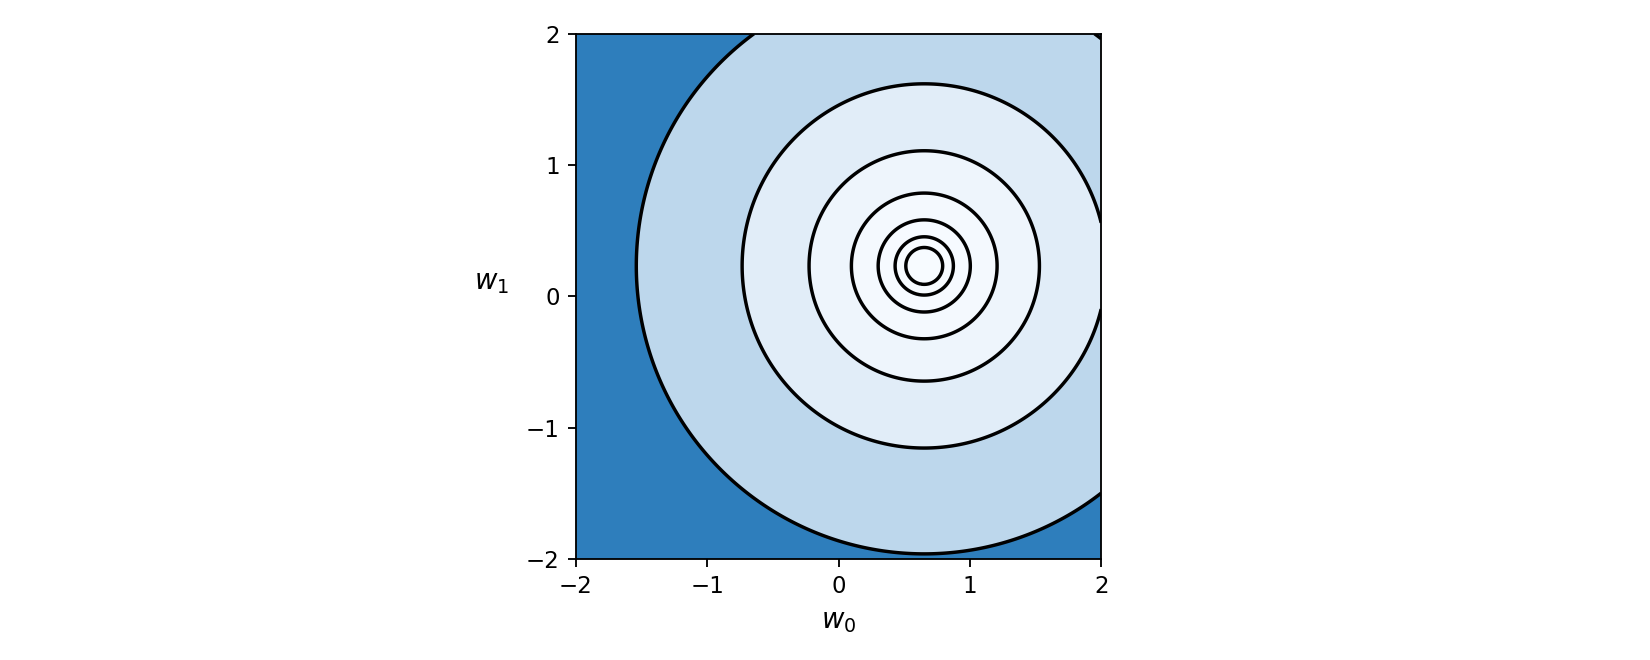

In [60]:
# show contour plot
demo.draw_setup(least_squares,num_contours = 7, xmin = -2,xmax = 2,ymin = -2,ymax = 2)

<IPython.core.display.Javascript object>


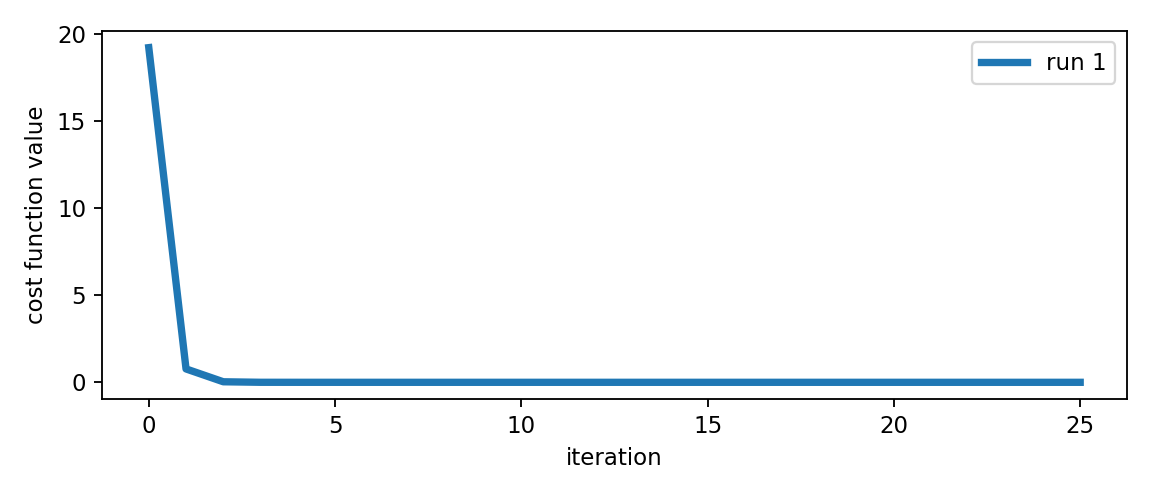

In [65]:
# run gradient descent initialized at 0
alpha = 10**(-2)
max_its = 25
w_init = np.zeros((2,1))

# run gradient descent
weight_history = gradient_descent(least_squares,w_init,alpha,max_its,beta = 0,version = 'unnormalized')

# plot cost function history
cost_history = [least_squares(v) for v in weight_history]
histories = [cost_history]
demo.compare_regression_histories(histories)

<IPython.core.display.Javascript object>


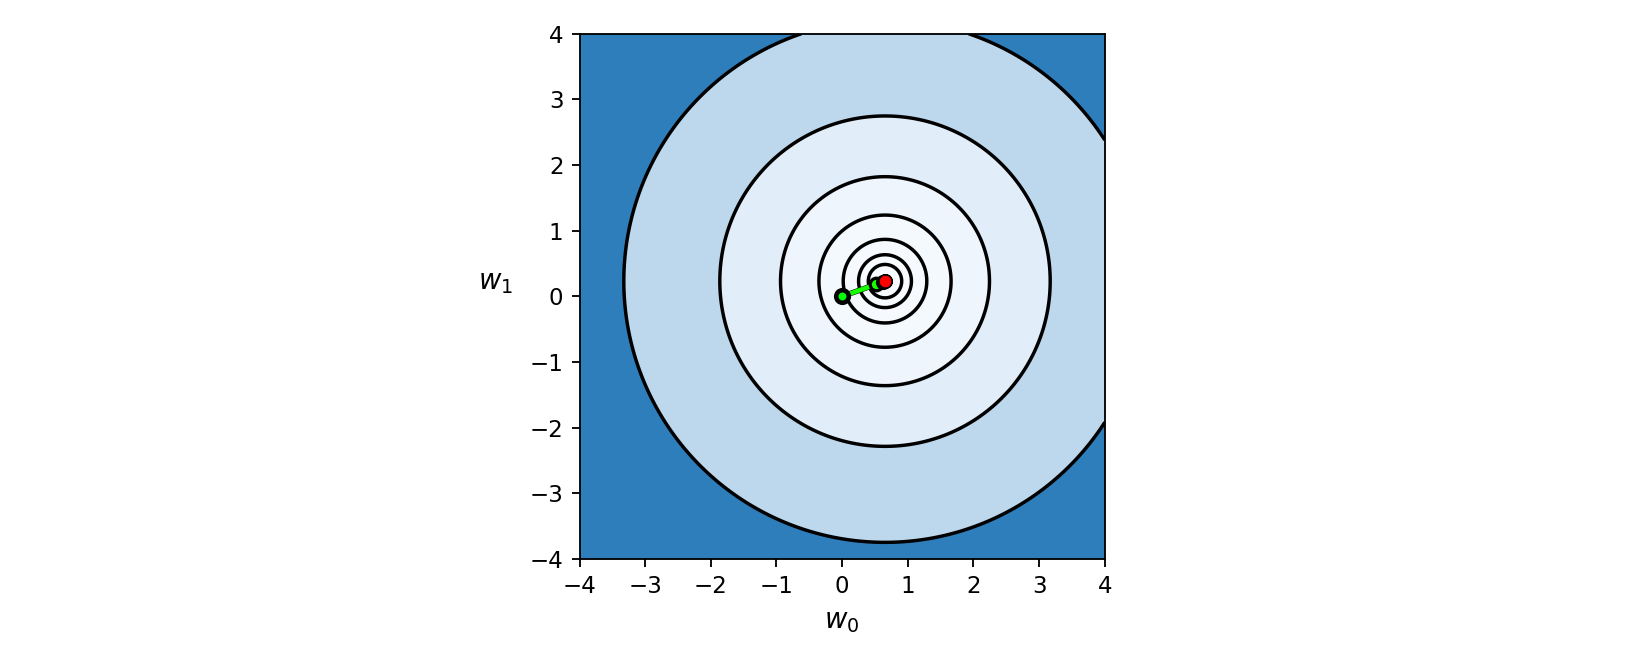

In [67]:
# plot history on contours
demo.draw_setup(least_squares,num_contours = 7,weight_history = weight_history, xmin = -4,xmax =4,ymin = -4,ymax =4)

It is obviouly that after normalize, we can increase the gradient step extremlly. And the minimum of cost function reduces